### 0. Importing Libraries

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Import Data

In [67]:
df = pd.read_csv('../data/raw/bank_customer_churn_prediction.csv')

### 2. Exploratory Data Analysis (EDA)

In [68]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [69]:
df.shape

(10000, 12)

In [70]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [71]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [73]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [112]:
df.duplicated().sum()

np.int64(0)

In [74]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [75]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [76]:
df['age'].value_counts()

age
37    478
38    477
35    474
36    456
34    447
     ... 
84      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [77]:
df['country'].value_counts()


country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [78]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [79]:
df['tenure'].value_counts()

tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [111]:
df.groupby('churn')[['churn', 'credit_card', 'products_number', 'active_member']].sum()

,churn,credit_card,products_number,active_member
churn,,,,
0,0,5631,12297,4416
1,2037,1424,3005,735


In [103]:
df.groupby('churn')[['products_number', 'credit_card', 'active_member', 'balance', 'tenure', 'age', 'credit_score', 'estimated_salary']].mean()

,products_number,credit_card,active_member,balance,tenure,age,credit_score,estimated_salary
churn,,,,,,,,
0,1.544267,0.707146,0.554565,72745.296779,5.033279,37.408389,651.853196,99738.391772
1,1.475209,0.699067,0.360825,91108.539337,4.932744,44.837997,645.351497,101465.677531


array([[<Axes: title={'center': 'customer_id'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'products_number'}>],
       [<Axes: title={'center': 'credit_card'}>,
        <Axes: title={'center': 'active_member'}>,
        <Axes: title={'center': 'estimated_salary'}>],
       [<Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

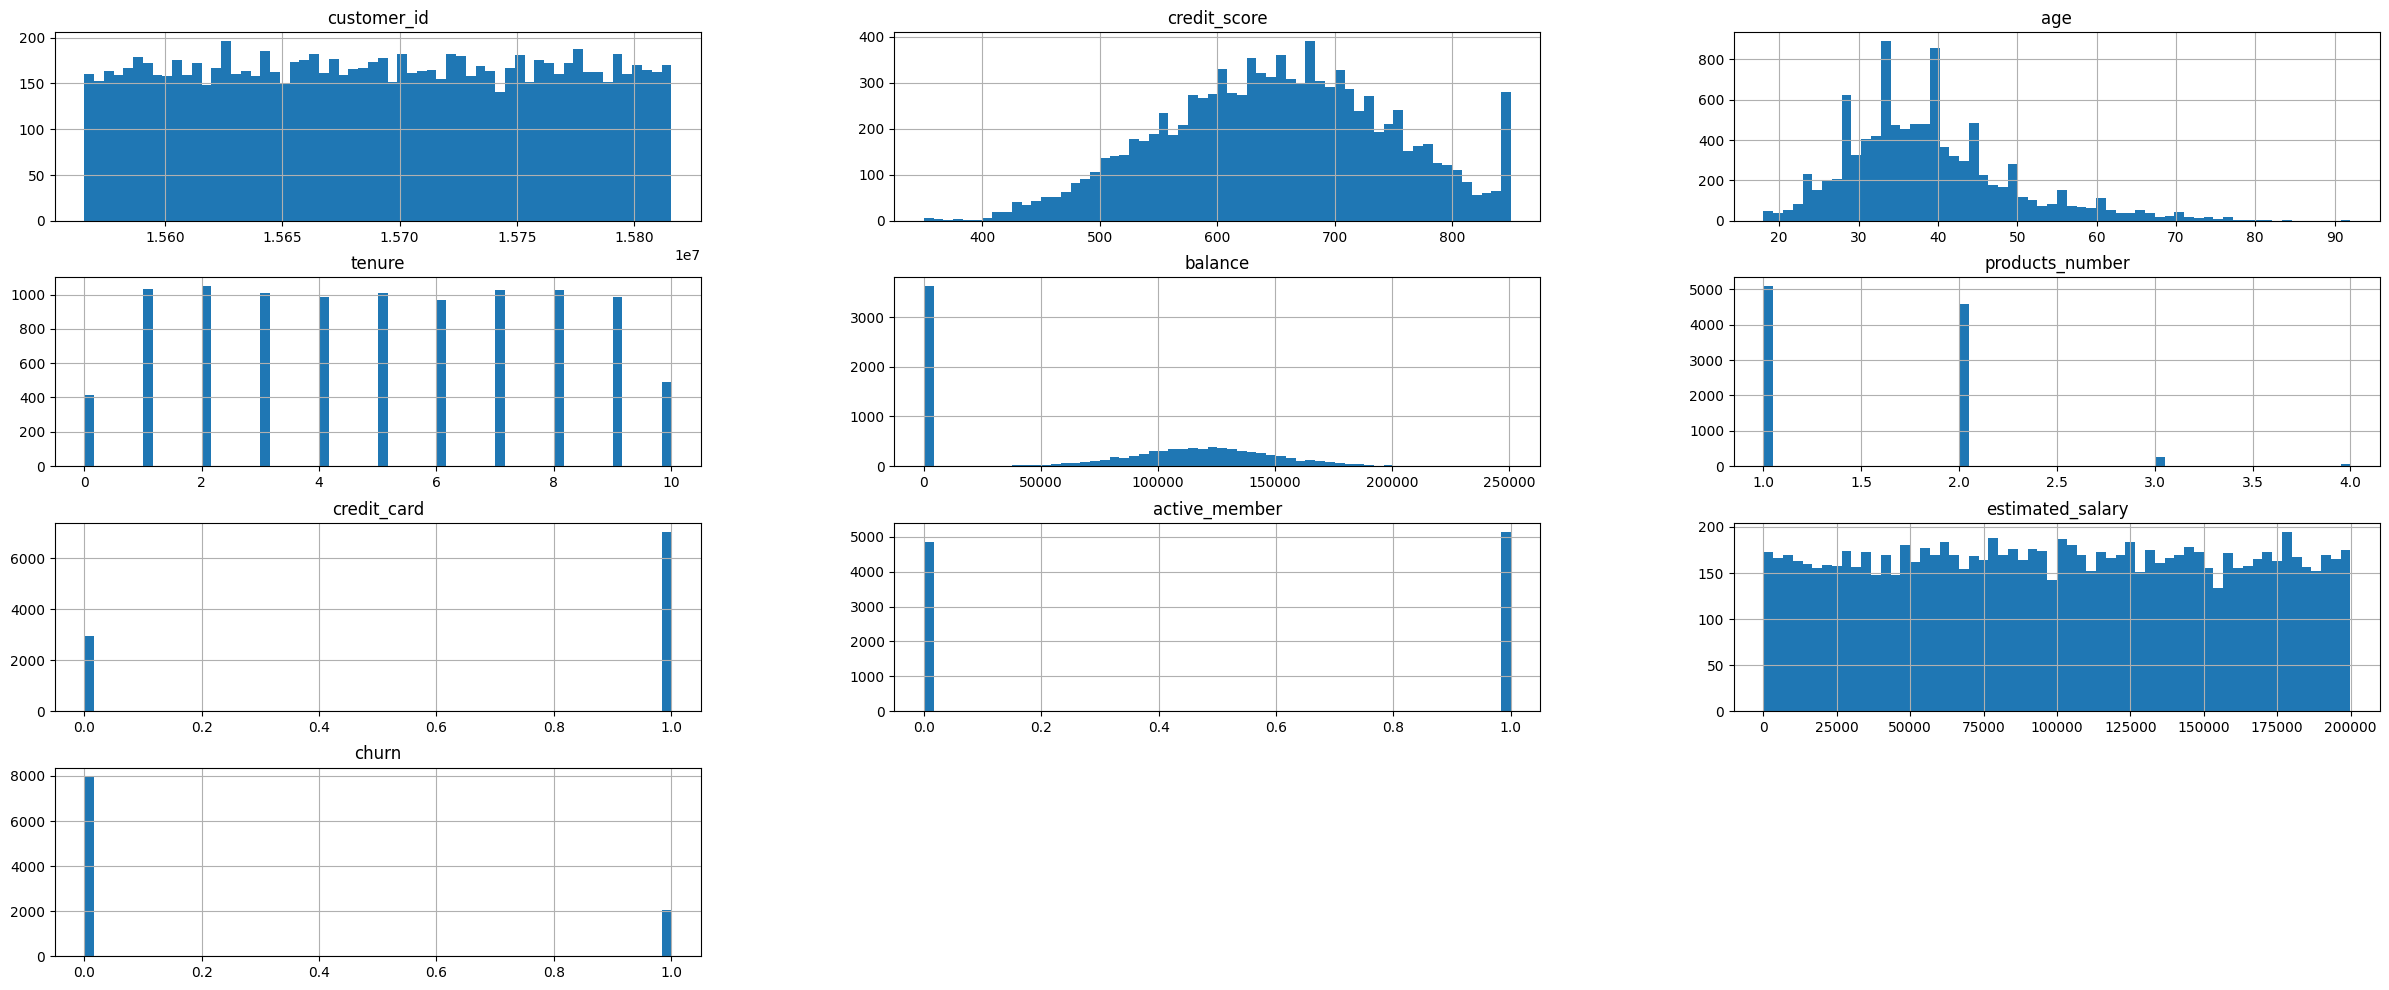

In [93]:
df.hist(bins=60, figsize=(30, 12))

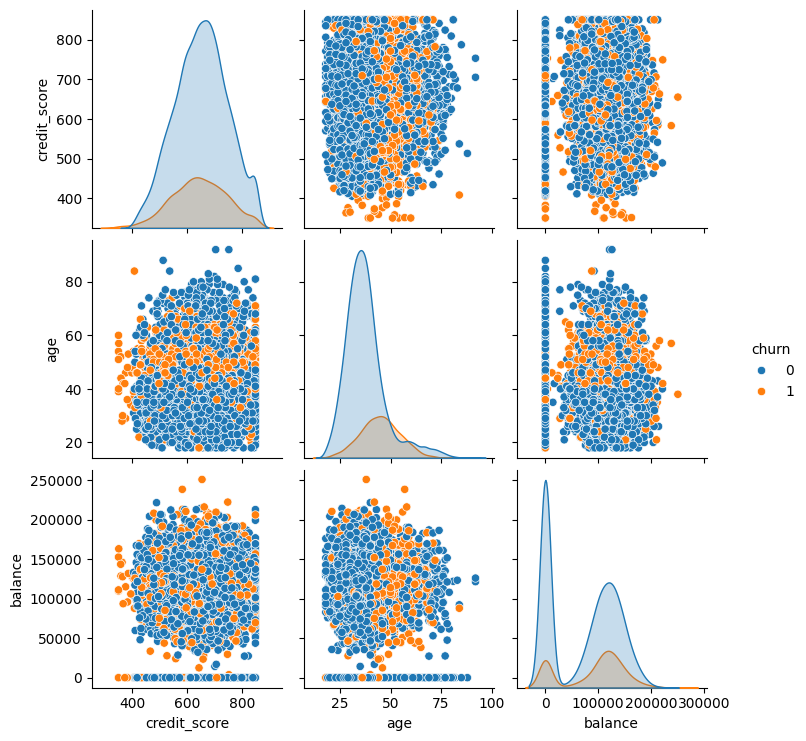

<Figure size 4000x2000 with 0 Axes>

In [124]:
sns.pairplot(df, hue='churn', diag_kind='kde', vars=['credit_score', 'age', 'balance'])
plt.figure(figsize=(40, 20))
plt.show()

In [127]:
df_churned_subset = df[df['churn'] == 1]
df_churned_subset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,15768163,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [129]:
df_not_churned_subset = df[df['churn'] == 0]
df_not_churned_subset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,15569266,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,15719294,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0


In [128]:
df_churned_subset.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,7.269262e+04,100.321503,9.761562,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,1.562736e+07,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,1.568896e+07,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,1.575309e+07,716.000000,51.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


In [130]:
df_not_churned_subset.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,7.963000e+03,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.0
mean,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.0
std,7.174423e+04,95.653837,10.125363,2.880658,62848.040701,0.509536,0.455101,0.497045,57405.586966,0.0
min,1.556570e+07,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0
25%,1.562882e+07,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000,0.0
50%,1.569154e+07,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000,0.0
75%,1.575335e+07,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000,0.0
max,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0


In [133]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

In [134]:
categorical_data.head()

,country,gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [136]:
corr = numeric_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


##### ***Churn*** v. ***Age***: Strong Positive Correlation
There is a strong positive correlation between ***age*** and ***churn***. From the ***age*** histogram (further above), there is not a large proportion of customers that are close to the end of average human life expectancy. Also, ***tenure*** and ***churn*** and not highly correlated. Hence, it is not the case that older customers are passing away and in turn causing ***churn***. 

##### ***Churn*** v. ***Active_Member***: Negative Correlation
There is a negative correlation between ***churn*** and ***active_member***. The correlation is in line with expectations. 

##### ***Balance*** v. ***Products_Number***: Strong Negative Correlation
There is strong negative correlation between ***balance*** and ***products_number***. One may expect the correlation to be positive as the number of products would imply more balances or greater balances held at the bank for a given customer. The correlation between ***balance*** and ***products_number*** is an area of consideration.

##### ***Balance*** v. ***Age***: Positive Correlation
There is positive correlation between ***balance*** and ***age***. Considering ***balance*** does not correlate strongly with other fields that may correlate with higher incomes or savings, namely, ***estimated_salary*** and ***age***, ***balance***'s correlation with ***age*** is a factor to consider. 